<a href="https://colab.research.google.com/github/yelenana/machine_learning/blob/main/Rybchynska_Olena_%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?



---
 Виконання завдання:

 1. **МНК**


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/ML/2_1/
medical_df = pd.read_csv("drive/MyDrive/ML/2_1/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
medical-charges.csv


In [280]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [281]:
X=non_smoker_df['age']
Y=non_smoker_df['charges']

In [282]:
X,Y

(1       18
 2       28
 3       33
 4       32
 5       31
         ..
 1332    52
 1333    50
 1334    18
 1335    18
 1336    21
 Name: age, Length: 1064, dtype: int64,
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64)

In [283]:
#Функція для знаходження коефіцієнтів лінійного рівняння
def normal_equestion(X,Y):
  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  return theta

In [284]:
X_1=np.c_[np.ones((X.shape[0],1)),X]
X_1

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [285]:
#Знайдемо коефіцієнти рівняння
MNK_coef=normal_equestion(X_1,Y)
MNK_coef

array([-2091.42055657,   267.24891283])

In [286]:
#Обчислимо прогнозні значення моделі
predictions_MNK=X_1.dot(MNK_coef)
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

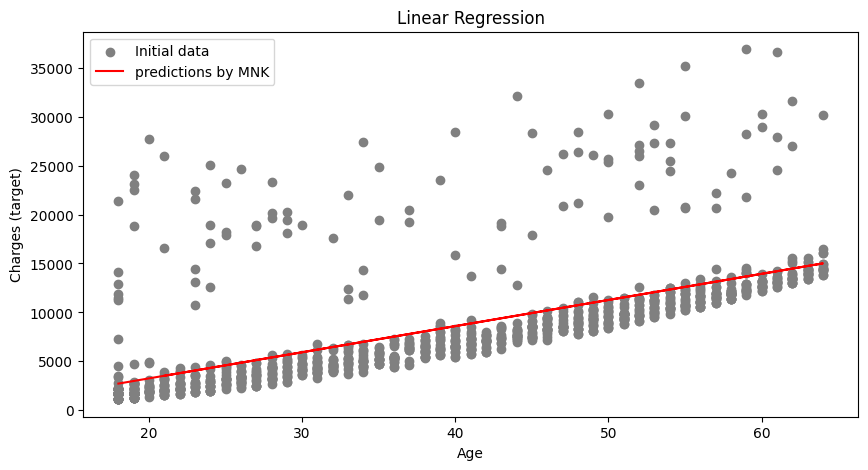

In [287]:
#Візуалфзація результатів
plt.figure(figsize=(10,5))
plt.scatter(X,Y,color='grey',label="Initial data")
plt.plot(X,predictions_MNK,color='red', label='predictions by MNK')
plt.xlabel('Age')
plt.ylabel('Charges (target)')
plt.title('Linear Regression')
plt.legend()
plt.show()


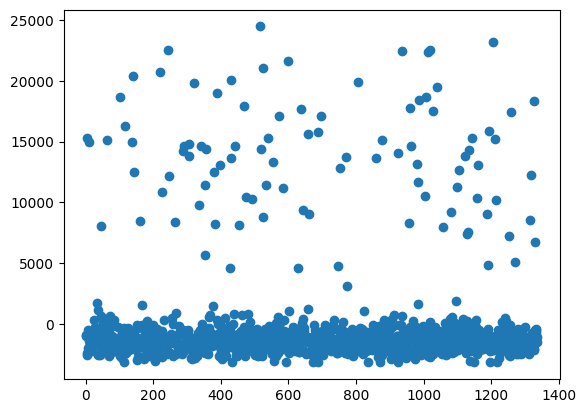

In [288]:
errors = Y - predictions_MNK
plt.plot(errors,'o')

Залишки не виглядають гомоскедастичними

In [289]:
# Розрахуємо корінь середньоквадратичної похибки значень рівняння від початкових даних
from numpy import sqrt,mean
rmse_MNK = sqrt(sum((Y-predictions_MNK)**2)/len(Y))

In [290]:
# Розрахуємо коефіцієнт детермінації

In [291]:
R2=1-sum((Y-predictions_MNK)**2)/sum((Y-mean(Y))**2)
R2

0.3943171632425905

2. **Метод градієнтного спуску**

In [292]:
import numpy as np

# Перетворюємо Series у двовимірний масив NumPy
Xgrad = X.to_numpy().reshape(-1, 1)

In [293]:
Ygrad = Y.to_numpy().flatten()

In [294]:
Xgrad

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]])

In [295]:
Ygrad

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

Для зручності у  фукнкцію розрахунку full_batch_gradient з прикладу додала ще й розрахунок rmse

In [296]:
def full_batch_gradient_descent(Xgrad, Ygrad, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(Ygrad)
    errors = []
    for _ in range(epochs):
        y_pred = m * Xgrad[:, 0] + b
        error = y_pred - Ygrad
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, Xgrad[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
        rmse_fb = sqrt(sum((error)**2)/len(y_pred))
    return m, b, errors,rmse_fb

m, b, errors,rmse_fb  = full_batch_gradient_descent(Xgrad, Ygrad, lr=0.00010, epochs=1000)
predictions_fbgd = m * Xgrad[:, 0] + b

m, b, rmse_fb

(np.float64(221.1045843794301),
 np.float64(-41.98126853149978),
 np.float64(4713.252868571573))

Далі хочу подивитися як буде змінюватися значення середньоквадратисної похибки при різних значеннях learning rate:

In [297]:
epochs = 8000
learning_rates = [ 0.0001, 0.0002, 0.0003, 0.0005, 0.00055,0.00057, 0.000571, 0.000572, 0.00058 ]

In [298]:
for lr_i in learning_rates:
    m, b, errors_list, rmse_fb = full_batch_gradient_descent(Xgrad, Ygrad, lr=lr_i, epochs=epochs)
    print(f"LR: {lr_i} -> m: {m:.2f}, b: {b:.2f}, RMSE: {rmse_fb:.2f}")



LR: 0.0001 -> m: 227.87, b: -342.39, RMSE: 4699.52
LR: 0.0002 -> m: 234.39, b: -632.19, RMSE: 4688.30
LR: 0.0003 -> m: 239.84, b: -873.98, RMSE: 4680.48
LR: 0.0005 -> m: 248.17, b: -1244.01, RMSE: 4671.22
LR: 0.00055 -> m: 249.82, b: -1317.40, RMSE: 4669.78
LR: 0.00057 -> m: 250.44, b: -1344.94, RMSE: 4669.27
LR: 0.000571 -> m: 250.46, b: -1346.29, RMSE: 4669.25
LR: 0.000572 -> m: -18477994159.12, b: -416044237.10, RMSE: 771479029572.34
LR: 0.00058 -> m: -10217458458480906374789757676198235647453643960636823021607744488672520164458481025815996226656032218152960.00, b: -230052074146988736887225692930871421657862126660806411458978972953927846373013864202247017458756111826944.00, RMSE: 414996409048919419908975433477276853156995643648373521440805471254422119811335898833497047422655948876939264.00


Методом підбору отримала найменше значення похибки (RMSE: 4669.25) при m: 250.46, b: -1346.29

In [299]:
m=250.46
b=-1346.29

In [300]:
predictions_fbgd = m * Xgrad[:, 0] + b

In [301]:
R2_fbgd=1-sum((Y-predictions_fbgd)**2)/sum((Y-mean(Y))**2)
R2_fbgd

0.39256489277185025

In [302]:
m, b, errors, rmse_fb = full_batch_gradient_descent(Xgrad, Ygrad, lr=0.000571 , epochs=epochs)

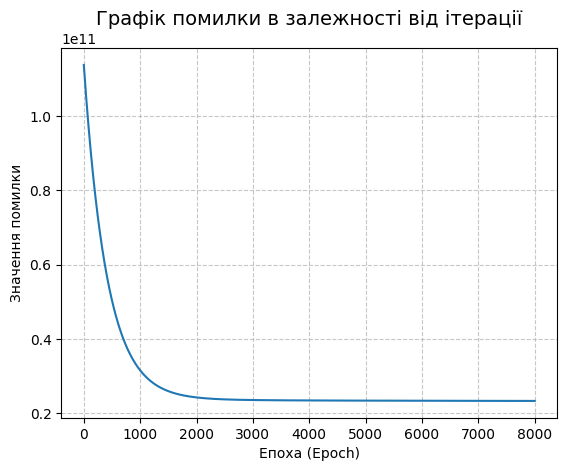

In [303]:
plt.plot(errors)
# Додаємо заголовок
plt.title("Графік помилки в залежності від ітерації", fontsize=14)

# Підписуємо осі (це гарний тон у Data Science)
plt.xlabel("Епоха (Epoch)")
plt.ylabel("Значення помилки")

# Додаємо сітку для зручності
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

3. **Scikit-learn.LinearRegression**

In [304]:
from sklearn.linear_model import LinearRegression

In [305]:
lin_reg=LinearRegression()
lin_reg.fit(X.to_frame(),Y)

LinearRegression()

In [306]:
lin_reg.fit(X.to_frame(),Y)

LinearRegression()

In [307]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [308]:
predictions_sklearn=lin_reg.predict(X.to_frame())
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [309]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [310]:
r2=r2_score(Y,predictions_sklearn)
r2

0.3943171632425906

In [311]:
rmse_scikit=mean_squared_error(Y,predictions_sklearn)**0.5
rmse_scikit

4662.505766636395

**Порівняння ліній регресії, отриманих 3-ма методами**

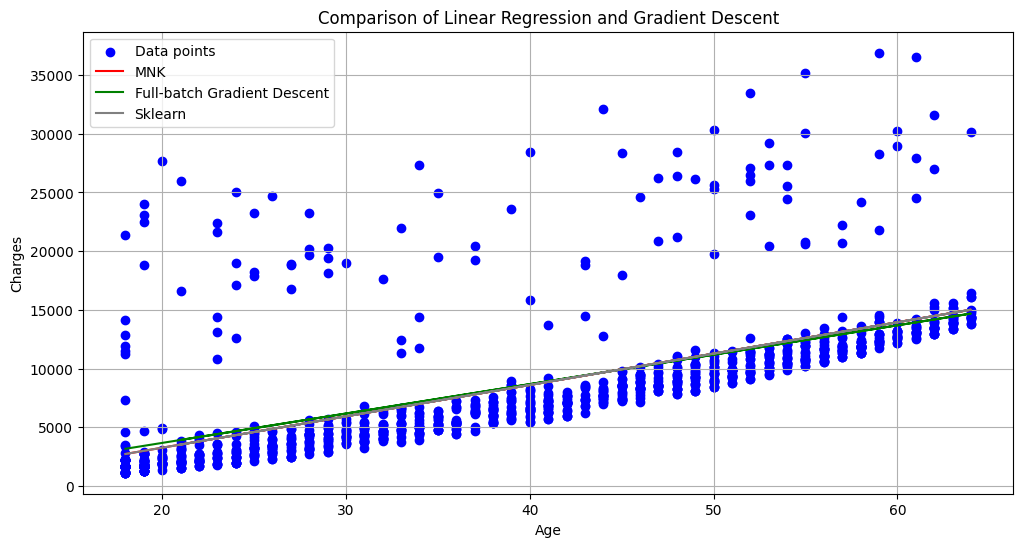

In [312]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(Xgrad, Y, color='blue', label='Data points')
plt.plot(Xgrad, predictions_MNK, color='red', label='MNK')
plt.plot(Xgrad, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(Xgrad, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Висновок:** в принципі і без графіку видно було, що значення коефіцієнтів моделі, отримані МНК та за допомогою використання scikit-learn.LinearRegression є майже однаковими, відрязняються хіба що десятитисячними і то як результат округлення. Значення ж отримані методом градієнтного спуску має відмінності, але, враховуючи величини самих змінних, ці відмінності доволі незначні, що підтверджується порівнням значень RMSE та R2. А взагалі всі 3 моделі незадовально описують вхідні дані, що підтверджується значенням R2, близьким 0,4 та дуже високим значенням RMSE

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [313]:
smoker_df=medical_df[medical_df.smoker=='yes']

In [314]:
Xsm = smoker_df['age']
Ysm = smoker_df['charges']

In [315]:
lin_reg_sm=LinearRegression()
lin_reg_sm.fit(Xsm.to_frame(),Ysm)

LinearRegression()

In [316]:
lin_reg_sm.fit(Xsm.to_frame(),Ysm)

LinearRegression()

In [317]:
lin_reg_sm.coef_, lin_reg_sm.intercept_

(array([305.23760211]), np.float64(20294.128126915966))

In [318]:
predictions_sklearn_sm=lin_reg_sm.predict(Xsm.to_frame())
predictions_sklearn_sm

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [319]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [320]:
r2=r2_score(Ysm,predictions_sklearn_sm)
r2

0.13558924096084068

In [321]:
rmse_scikit_sm=mean_squared_error(Ysm,predictions_sklearn_sm)**0.5
rmse_scikit_sm

10711.00334810241

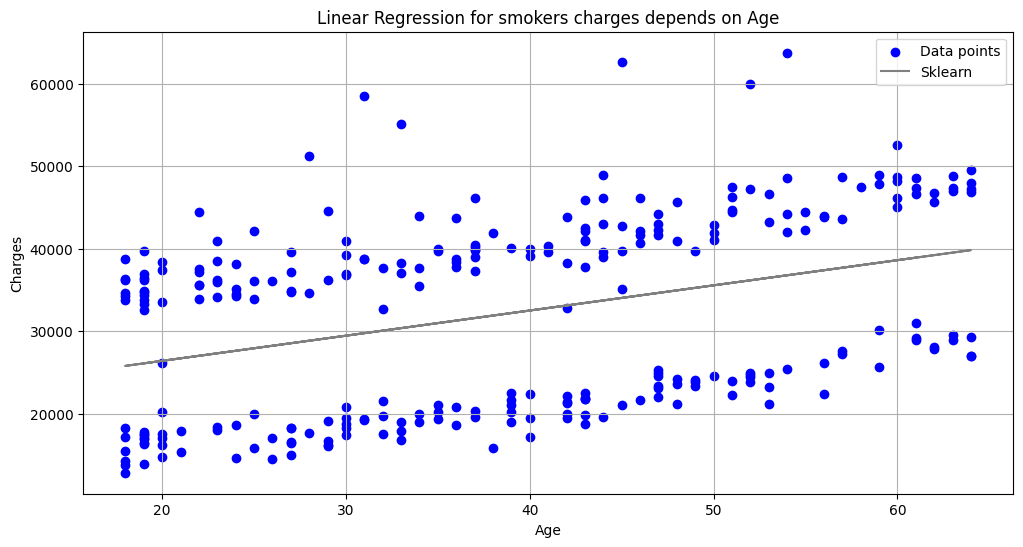

In [322]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(Xsm, Ysm, color='blue', label='Data points')
plt.plot(Xsm, predictions_sklearn_sm, color='grey', label='Sklearn')
plt.title('Linear Regression for smokers charges depends on Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

**Висновок:** я б на практиці не використовувала дану модель, коефіцієнт детермінації дуже низький (0.135), а RMSE має дуже велике значення. З графіку теж видно, що вхідні дані формують 2 окремі кластери, в той час як лінія регресії пролягає між ними, а значить не описує поведінку жодного з них